# Data Analysis on Whether Underperforming Coaches are More Likely to be Fired in College Basketball
### By Aaron Cronin, Thomas Hurtubise, and Tony Rosler
## Executive Summary of Each Section
### Section 1: Introduces research question, does single-season underperformance mean a coach is more likely to be fired?
### Section 2: Establishes the benchmark performance level for each school using 20 years of win-loss data.
### Section 3: Evaluates coach firings and use performance data to run regressions to reveal the relationship between performance and firing.
### Section 4: Explores whether the chosen benchmark may be flawed using machine learning techniques.
### Section 5: Concludes on the findings and provide future research avenues.

## Section 1: Introduction
### Turnover at the head of college athletics teams is an interesting phenomenon. These highly paid positions have their job performance televised and scrutinized by sports analysts and commentators who pontificate on whether any given season may be a coach's last. As a result, this report is motivated to explore one of the most salient indicators of performance, the win-loss record for a coach over the course of a season, to determine how this factor indicates whether a coach will be fired after that season. One's intution may predict that the performance of a college basketball team would obviously portend to a coach's firing, but the empirical findings may murky that clear heuristical picture.  


## Section 2: Setting Performance Benchmarks and other School Level Analysis

### To evaluate whether a coach underperformed in a given season, one must first determine the benchmark for performance. Across college basketball as a whole, the mean performance for all teams is an even number of wins and losses, or .500 on a scale where zero is all losses and 1 is all wins. This expected value arises because college basketball is a zero sum game; for every team that wins, another must lose. However, using .500 as the benchmark for a coaches' performance is fallacious. Each team is apt to have different standards for its coach because not all schools perform at an equal level. Some teams that win far more than they lose, and vice versa for other teams. 

### In an effort to quantify this performance differential by school, we pulled 20 years of data from https://www.sports-reference.com/cbb/ which reports college basketball figures statistics. We selected the 1993-1994 season up until the 2012-2013 season. We chose this range because we wanted to make sure that the performance benchmarks we created would be align with how teams have performed over a medium timespan. Too few years may lack validity, as certain teams may have performed notably well or poorly, skewing the data. Conversely, too many years would lead to the inclusion of data that is too old to factor into institutional decision making because of changes to the sport and the level of competition. Twenty years strikes a fair middle ground. Additionally, we stopped at the 2012-2013 season so we could have five years of coaching performance data starting with the 2013-2014 season that are not auto-correlated with the data used to create the performance benchmarks. Finally, in the initialized DataFrames, the data from a given year is notated using the first year for the season unless stated otherwise, meaning the 1993-94 season is given by 1993.

In [69]:
import pandas as pd                     # Pandas for DataFrame creation
import matplotlib.pyplot as plt         # Matplotlib to create graphs
import numpy as np                      # Numpy to create arrays and utilize aggregation functions
import statsmodels.formula.api as smf   # Statsmodels for regressions
import plotly.plotly as pyt             # Plotly packages for interactive scatter plot
import plotly.graph_objs as go
%matplotlib inline 

In [70]:
#Creating DataFrames for college basketball seasons 1993-1994 through 2012-2013

DF_all=dict() #Initializes a dictionary to hold all the DataFrames

#This for loop goes through all of the files systematically and adds them to the dictionary 
#The loop converts the x into multiple types through the given range to create key values and strings where needed. 
for x in range(1993, 2013): 

    DF_all['DF%s' % x]= pd.read_csv('/Users/aaroncronin/Desktop/Project_Data_Analysis/'+str(x)+' All Teams.csv')

In [71]:
#When we originally ran the merge, we noticed a lot of schools had been eliminated 
#Inspecting the problem, we noticed a strange character "梧" in the 2011 DataFrame, followed by NCAA 
#This character makes those items inconsistent with the school names in other DataFrames, and needs to be cleaned from the data
DF_all['DF2011'].head(10)

,Rk,School,G,W 2011,L 2011,W-L% 2011,SRS,SOS,W 2011 Conf,L 2011 Conf,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,1,Air Force,29,13,16,0.448,-0.45,2.14,3,11,...,362,537,0.674,178,767,403,194,90,371,491
1,2,Akron,34,22,12,0.647,6.33,0.72,13,3,...,513,741,0.692,398,1098,475,247,141,480,616
2,3,Alabama A&M,28,7,21,0.250,-19.33,-10.79,5,13,...,359,555,0.647,316,849,314,178,119,463,617
3,4,Alabama-Birmingham,31,15,16,0.484,2.61,3.64,9,7,...,388,566,0.686,350,997,352,136,110,439,494
4,5,Alabama State,31,12,19,0.387,-15.79,-9.96,9,9,...,354,606,0.584,400,982,357,236,95,470,614
5,6,Alabama梧NCAA,33,21,12,0.636,13.76,7.18,9,7,...,443,623,0.711,352,1066,402,239,137,423,607
6,7,Albany (NY),34,19,15,0.559,-3.92,-6.92,9,7,...,524,694,0.755,400,1072,424,193,95,429,578
7,8,Alcorn State,32,10,22,0.313,-19.57,-10.61,6,12,...,420,606,0.693,291,872,290,199,104,482,606
8,9,American,32,20,12,0.625,-3.12,-5.24,10,4,...,406,567,0.716,281,948,404,146,92,355,544
9,10,Appalachian State,31,13,18,0.419,-6.93,-3.28,7,11,...,426,656,0.649,333,1009,379,187,125,444,609


In [72]:
n_rows,n_columns=DF_all['DF2011'].shape #Creating multiple variables using the values given by the shape attribute

In [73]:
#Cleaning DF2011 in the dictionary using the n_rows variable created above to set the value for the for loop 
#and the .replace function to eliminate the undesired characters.
for z in range(n_rows-1):
    DF_all['DF2011']['School'][z]= DF_all['DF2011']['School'][z].replace('梧NCAA','')

/Users/aaroncronin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### To explore each team’s performance, we created a dictionary that contained the 20 separate DataFrames for each year of data. The dictionary stores the name of the DataFrames as the keys, and the actual DataFrames as the values, allowing us to iterate over the keys by making them into a callable list. Subsequently, we created an if-else statement nested within a for loop that could quickly select the columns from each DataFrame with the parameter of interest, namely the win-loss percentage for each school, and merge them on school to a new DataFrame containing 20 years of win-loss records by school. The DataFrames for each year are identical in shape and column headings, so we could use the same index numbers to slice all of the DataFrames as we merged them. We chose to use inner when running this merge to eliminate all the schools that do not have all 20 years of data. Schools that were eliminated fall into one of two categories: either they have stopped competing in college basketball and thus will not have coaching data in the range in which we are interested, or they are newer teams whose coaching may be more or less volatile than average. By limiting our data set to established teams, we can mitigate the potential for confounding from the potential volatility from the newer teams altering our statistical models. Even with this selection process, we still have nearly 300 Schools to consider in the full DataFrame.

In [74]:
all_df_list=list(DF_all.values()) #Here we are creating a list containing all the DataFrames using the dictionary.
#This enables us to iterate over every DataFrame in a for loop.

In [75]:
for i in range(len(all_df_list)-1): #This for loop will merge the relevant columns from all the annualized DataFrames into DF_Master
    
    if i ==0: #This if statement creates DF_Master as a merge of the Win-Loss percentages from the first two Dataframes
        
        DF_Master = pd.merge(all_df_list[i].iloc[:,[1,5]], all_df_list[i+1].iloc[:,[1,5]], how='inner', on=['School'])
        
    else: #This else statement merges DF_Master with all the subsequent DataFrame slices starting with the list's third DataFrame
        DF_Master= pd.merge(DF_Master, all_df_list[i+1].iloc[:,[1,5]], how='inner', on=['School'])
        


In [76]:
DF_Master #The result is a DataFrame with 298 teams

,School,W-L% 1993,W-L% 1994,W-L% 1995,W-L% 1996,W-L% 1997,W-L% 1998,W-L% 1999,W-L% 2000,W-L% 2001,...,W-L% 2003,W-L% 2004,W-L% 2005,W-L% 2006,W-L% 2007,W-L% 2008,W-L% 2009,W-L% 2010,W-L% 2011,W-L% 2012
0,Air Force,0.308,0.286,0.179,0.269,0.385,0.385,0.286,0.276,0.321,...,0.759,0.600,0.774,0.743,0.533,0.323,0.323,0.500,0.448,0.563
1,Akron,0.308,0.308,0.115,0.308,0.630,0.667,0.607,0.429,0.323,...,0.464,0.655,0.697,0.788,0.686,0.639,0.686,0.639,0.647,0.788
2,Alabama-Birmingham,0.733,0.467,0.533,0.563,0.636,0.625,0.500,0.548,0.433,...,0.688,0.667,0.774,0.484,0.676,0.647,0.735,0.710,0.484,0.485
3,Alabama State,0.655,0.423,0.333,0.276,0.393,0.407,0.464,0.710,0.594,...,0.516,0.500,0.400,0.333,0.645,0.688,0.516,0.486,0.387,0.313
4,Alabama,0.667,0.697,0.594,0.548,0.484,0.531,0.448,0.694,0.771,...,0.606,0.750,0.581,0.625,0.515,0.563,0.531,0.676,0.636,0.639
5,Alcorn State,0.111,0.269,0.400,0.393,0.444,0.767,0.655,0.500,0.677,...,0.379,0.241,0.286,0.367,0.226,0.194,0.065,0.143,0.313,0.294
6,American,0.296,0.321,0.444,0.407,0.321,0.250,0.379,0.259,0.600,...,0.581,0.571,0.414,0.533,0.636,0.750,0.355,0.710,0.625,0.333
7,Appalachian State,0.593,0.310,0.286,0.500,0.724,0.724,0.719,0.355,0.357,...,0.300,0.600,0.467,0.758,0.581,0.419,0.649,0.516,0.419,0.484
8,Arizona State,0.536,0.727,0.407,0.333,0.563,0.467,0.594,0.448,0.483,...,0.370,0.563,0.393,0.267,0.618,0.714,0.667,0.387,0.323,0.629
9,Arizona,0.829,0.742,0.788,0.735,0.857,0.759,0.794,0.778,0.706,...,0.667,0.811,0.606,0.645,0.559,0.600,0.516,0.789,0.657,0.771


In [77]:
n_rows_1,n_columns_1=DF_Master.shape #We create a new variable for further cleaning using the same techniques as above

In [78]:
for i in range(n_rows_1-1): #Another loop for cleaning, using rstrip to eliminate blank space that may exist in school names
    DF_Master['School'][i]= str.rstrip(DF_Master['School'][i])

/Users/aaroncronin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [79]:
DF_WL = DF_Master.set_index(['School']) #Setting the index to school for graphing and to make subsequent calculations easier
#Creating a copy of DF_Master as DF_WL, to perform manipulations like renaming the columns.

In [80]:
#List comprehension to rename the columns to just the year names, since they are all win loss percentages
DF_WL.columns=[i for i in range (1993,2013)]

In [81]:
DF_WL.head(5)

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
School,,,,,,,,,,,,,,,,,,,,
Air Force,0.308,0.286,0.179,0.269,0.385,0.385,0.286,0.276,0.321,0.429,0.759,0.600,0.774,0.743,0.533,0.323,0.323,0.500,0.448,0.563
Akron,0.308,0.308,0.115,0.308,0.630,0.667,0.607,0.429,0.323,0.500,0.464,0.655,0.697,0.788,0.686,0.639,0.686,0.639,0.647,0.788
Alabama-Birmingham,0.733,0.467,0.533,0.563,0.636,0.625,0.500,0.548,0.433,0.618,0.688,0.667,0.774,0.484,0.676,0.647,0.735,0.710,0.484,0.485
Alabama State,0.655,0.423,0.333,0.276,0.393,0.407,0.464,0.710,0.594,0.483,0.516,0.500,0.400,0.333,0.645,0.688,0.516,0.486,0.387,0.313
Alabama,0.667,0.697,0.594,0.548,0.484,0.531,0.448,0.694,0.771,0.586,0.606,0.750,0.581,0.625,0.515,0.563,0.531,0.676,0.636,0.639


In [82]:
DF_WL['Mean']=DF_WL.mean(axis=1) #Establishes a column that will hold the mean for each row
#This is the average win-loss percentage across all 20 years 
#This mean is also what we plan to use as the performance benchmark against which coaches are compared

### After performing some column renaming to make the data more easily readable, we calculated the average win-loss percentage for all the teams to verify our initial assumption about the performance differential between the teams. From here, we have made a series of graphs to explore the statistical features of the different performance levels for various college basketball teams.

In [83]:
DF_WL.sort_values('Mean', ascending=False)

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,Mean
School,,,,,,,,,,,,,,,,,,,,,
Kansas,0.771,0.806,0.853,0.944,0.897,0.697,0.706,0.788,0.892,0.789,...,0.767,0.758,0.868,0.925,0.771,0.917,0.921,0.821,0.838,0.82280
Duke,0.824,0.419,0.581,0.727,0.889,0.949,0.853,0.897,0.886,0.788,...,0.818,0.889,0.667,0.824,0.811,0.875,0.865,0.794,0.833,0.80135
Kentucky,0.794,0.848,0.944,0.875,0.897,0.757,0.697,0.706,0.688,0.889,...,0.824,0.629,0.647,0.581,0.611,0.921,0.763,0.950,0.636,0.77505
Gonzaga,0.733,0.700,0.700,0.556,0.706,0.800,0.743,0.788,0.879,0.727,...,0.839,0.879,0.676,0.758,0.824,0.794,0.714,0.788,0.914,0.77105
Connecticut,0.853,0.848,0.914,0.545,0.865,0.944,0.714,0.625,0.794,0.697,...,0.742,0.882,0.548,0.727,0.861,0.529,0.780,0.588,0.667,0.74845
Syracuse,0.767,0.667,0.763,0.594,0.743,0.636,0.813,0.735,0.639,0.857,...,0.794,0.657,0.686,0.600,0.737,0.857,0.771,0.919,0.750,0.73635
North Carolina,0.800,0.824,0.656,0.800,0.895,0.706,0.611,0.788,0.286,0.543,...,0.892,0.742,0.816,0.923,0.895,0.541,0.784,0.842,0.694,0.73355
College of Charleston,0.857,0.793,0.862,0.906,0.800,0.903,0.800,0.759,0.700,0.758,...,0.643,0.607,0.667,0.485,0.750,0.647,0.703,0.613,0.686,0.73145
Arizona,0.829,0.742,0.788,0.735,0.857,0.759,0.794,0.778,0.706,0.875,...,0.811,0.606,0.645,0.559,0.600,0.516,0.789,0.657,0.771,0.72420


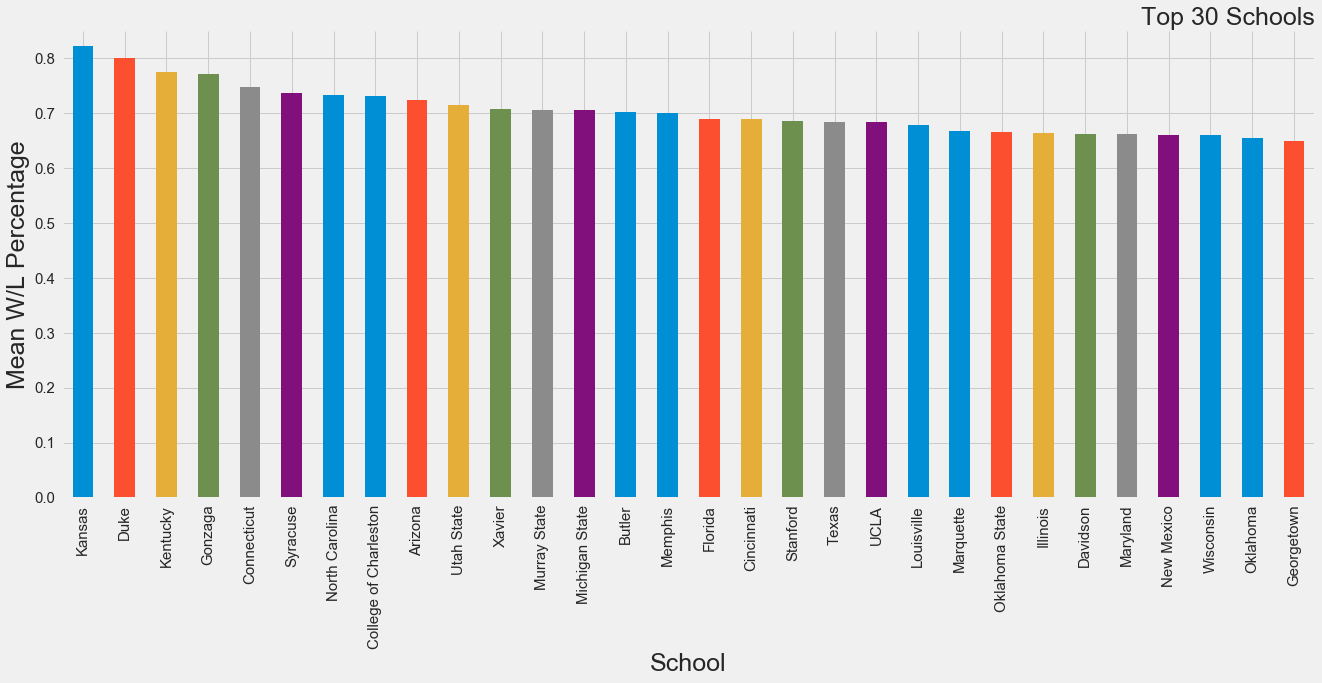

In [84]:
#Graphing the top 30 schools based on Mean W/L Percentage
plt.style.use('fivethirtyeight') #Style setting

fig, ax = plt.subplots()
ax.set_xlabel('School',fontsize=25)
ax.set_ylabel('Mean W/L Percentage',fontsize=25)
ax.set_ylim(0, .85) #Setting a uniform y range for this and the following plot
ax.set_title('Top 30 Schools',loc='right',fontsize=25)

DF_WL.sort_values('Mean', ascending=False)['Mean'].iloc[0:30].plot(ax=ax,kind='bar',figsize=(20,8),fontsize=15)
#The iloc pulls only the top 30 schools

ax.spines['top'].set_visible(False)

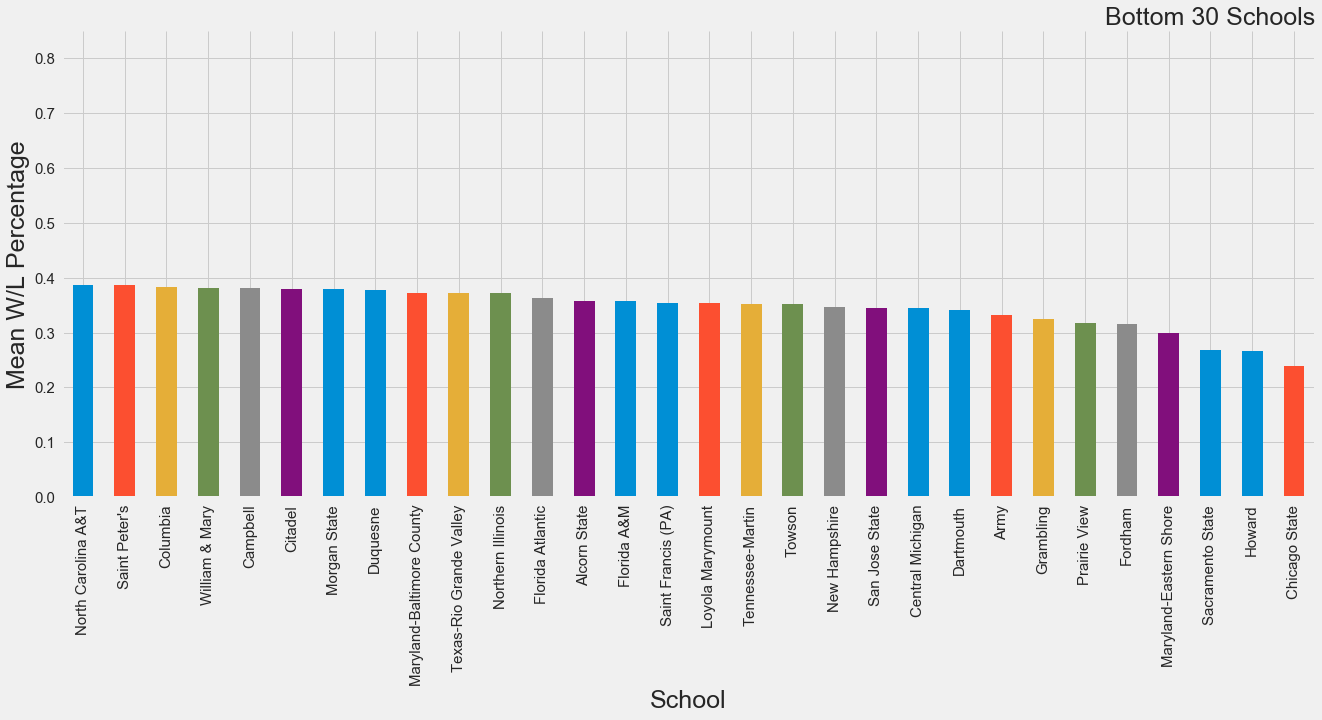

In [85]:
#Graphing The bottom 30 schools based on Mean W/L Percentage
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
ax.set_xlabel('School',fontsize=25)
ax.set_ylabel('Mean W/L Percentage',fontsize=25)
ax.set_ylim(0, .85)
ax.set_title('Bottom 30 Schools',loc='right',fontsize=25)

DF_WL.sort_values('Mean', ascending=False)['Mean'].iloc[268:].plot(ax=ax,kind='bar',figsize=(20,8),fontsize=15)
#The iloc here pulls the bottom 30 schools by going from 268 until the end

ax.spines['top'].set_visible(False)

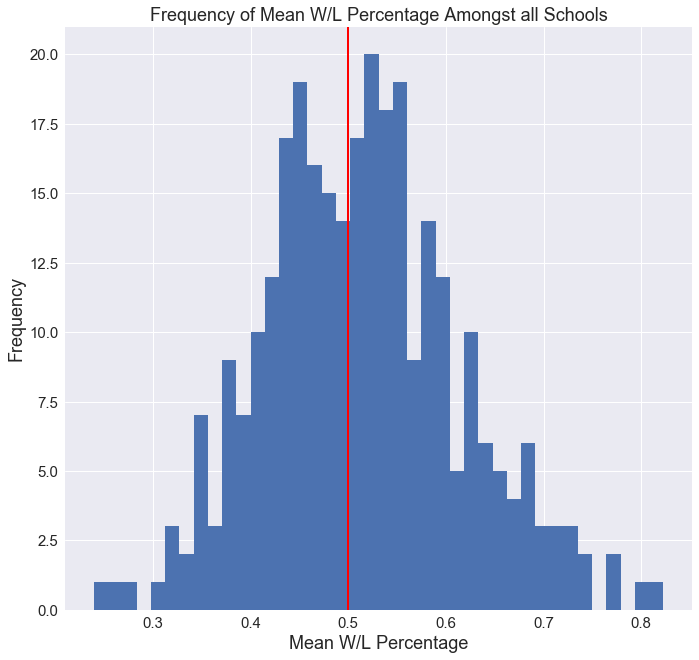

In [86]:
#Creating a histogram of the Average Win-Loss Percentages
plt.style.use('seaborn')
fig, ax = plt.subplots()
DF_WL['Mean'].plot.hist(ax=ax,bins=40,figsize=(10,10))#40 bins to show a certain level of precision across the data
ax.set_xlabel('Mean W/L Percentage',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
ax.tick_params(labelsize=15)
ax.set_title("Frequency of Mean W/L Percentage Amongst all Schools",fontsize=18)

plt.axvline(x=.5, ymin=0, ymax = 12, linewidth=2, color='r') #Line added to represent the expected value for the mean

ax.spines['top'].set_visible(False)

In [87]:
DF_WL['Mean'].describe()

count    298.000000
mean       0.513609
std        0.101536
min        0.239400
25%        0.443962
50%        0.512550
75%        0.576850
max        0.822800
Name: Mean, dtype: float64

### The graphs of the top and bottom 30 teams reveal there are teams that compete at a very high level and those that compete at a very low level, confirming our original assumption. All of the top 30 schools average performance exceeds .600, and Kansas and Duke both exceed .800, meaning they have won 80% of their games from 1993-2013. Conversely, none of the bottom 30 schools exceed .400, and Chicago State won less than 25% of its games over the same 20 years. The histogram of win-loss averages illustrates the full spectrum of school performance levels and shows that a average performance level is distributed roughly normally around .500, which makes sense given the zero-sum nature of college basketball. Interestingly, the histogram reveals two distinct peaks on either side of .500, meaning more teams do somewhat better or worse than average than those that actually match the average. Additionally, the mean of the win-loss averages is slightly above .500. Ultimately, this anomoly means that the teams eliminated in the merging process lost games at a slightly higher rate than those included in the model. This finding heuristically makes sense when considering that the merging process eliminated teams that stopped competing or new teams that may still be adjusting to the level of competition in Division 1 college basketball. 

### Given that the data supports our assumptions about the differential performance levels of the college basketball teams, we feel comfortable using the average win-loss percentage across 20 years for each school as the benchmark of performance against which coaches are measured when Universities make firing decisions.

## Section 3: Analyzing Coach Firing Using Underperformance Relative to Historical Benchmarks

### Using the same website as before, we created five DataFrames with coaching data and merged them to make a master DataFrame. At this point, we realized that although we would be able to delineate between coaches who were present one year and gone the next, that would not reveal whether or not their departure was because they were fired. Coaches also resign to pursue better coaching positions, often predicated on good performance in their current coaching job, or retire, neither of which is congruent with our model. Therefore, we decided to get a list of all the coaches who were fired as given by http://collegesportsinfo.com and use the export function to pull the master coach DataFrame and manually add columns that show whether or not a coach was fired and when. In the notation for when a coach was fired, 2014 refers to being fired after the 2013-2014 season, and so on up until 2017. We did not include 2018 firings to potentially test and see whether or not our regressions could create a threshold of single season underperformance that we could apply to the 2017-18 season to assess its validity in predicting actual fired coaches. Once the variables of if and when a coach was fired had been added, we imported the new DataFrame to run further analysis.

In [88]:
#Creating the Coach DataFrames for the 2013-2014 season through 2017-2018
DF_all_coach=dict()

for w in range (13,18):
    globals()['Coach%s' % w] = pd.read_csv('/Users/aaroncronin/Desktop/Project_Data_Analysis/Coaches/20'+str(w)+' Coaches.csv')
    DF_all_coach['Coach%s' % w]= pd.read_csv('/Users/aaroncronin/Desktop/Project_Data_Analysis/Coaches/20'+str(w)+' Coaches.csv')

In [89]:
#Merging the Coach Dataframes using the same general


all_coach_list=list(DF_all_coach.values())

In [90]:
for i in range(len(all_coach_list)-1):
    
    if i ==0:
        DF_Master_Coach = pd.merge(all_coach_list[i], all_coach_list[i+1], how='outer', on=['Coach'])
        
    else:
        DF_Master_Coach = pd.merge(DF_Master_Coach, all_coach_list[i+1], how='outer', on=['Coach'])

In [91]:
DF_Master_Coach

,Coach,School_x,Conference_x,W_2013,L_2013,W-L%_2013,AP_Pre_2013,AP_Post_2013,NCAA_Tournament_2013,Since_2013,...,S16_Career_2017,FF_Career_2017,Chmp_Career_2017,W_Overall_2017,L_Overall_2017,W-L%_Overall_2017,NCAA_Overall_2017,S16_Overall_2017,FF_Overall_2017,Chmp_Overall_2017
0,Joe Golding,Abilene Christian,Southland,11.0,20.0,0.355,NaN,NaN,NaN,2013-14,...,NaN,NaN,NaN,63.0,91.0,0.409,NaN,NaN,NaN,NaN
1,Dave Pilipovich,Air Force,MWC,12.0,18.0,0.400,NaN,NaN,NaN,2011-12,...,NaN,NaN,NaN,84.0,113.0,0.426,NaN,NaN,NaN,NaN
2,Keith Dambrot,Akron,MAC,21.0,13.0,0.618,NaN,NaN,NaN,2004-05,...,NaN,NaN,NaN,341.0,189.0,0.643,3.0,NaN,NaN,NaN
3,Anthony Grant,Alabama,SEC,13.0,19.0,0.406,NaN,NaN,NaN,2009-10,...,NaN,NaN,NaN,207.0,127.0,0.620,3.0,NaN,NaN,NaN
4,Willie Hayes,Alabama A&M,SWAC,14.0,16.0,0.467,NaN,NaN,NaN,2011-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Jerod Haase,Alabama-Birmingham,CUSA,18.0,13.0,0.581,NaN,NaN,NaN,2012-13,...,NaN,NaN,NaN,113.0,86.0,0.568,1.0,NaN,NaN,NaN
6,Lewis Jackson,Alabama State,SWAC,19.0,13.0,0.594,NaN,NaN,NaN,2005-06,...,NaN,NaN,NaN,187.0,219.0,0.461,2.0,NaN,NaN,NaN
7,Will Brown,Albany (NY),AEC,19.0,15.0,0.559,NaN,NaN,Lost Second Round,2001-02,...,NaN,NaN,NaN,282.0,248.0,0.532,5.0,NaN,NaN,NaN
8,Luther Riley,Alcorn State,SWAC,12.0,19.0,0.387,NaN,NaN,NaN,2011-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Mike Brennan,American,Patriot,20.0,13.0,0.606,NaN,NaN,Lost Second Round,2013-14,...,NaN,NaN,NaN,63.0,94.0,0.401,1.0,NaN,NaN,NaN


In [92]:
#Export function to add data on firing that we cannot accurately extrapolate from the data as given
#Only Thomas used this code and then shared the new csv file used in the code below, thus it is commented out
#DF_Master_coach.to_excel('C:/Users/thoma/Documents/Coach_Master.xlsx')

In [93]:
#Importing the file with the firing data included
DF_Fired = pd.read_csv('/Users/aaroncronin/Desktop/Project_Data_Analysis/Coaches/Coach_Master_Fireds.csv')

In [94]:
#We have identified some of schools that have different names in the Coach DataFrames than the School Performance DataFrame 
#To handle this we identified the schools in excel and created a csv key of the wrong and right names
#We will now create a list of the schools and replce them withon the DF_Fired data frame
faulty_school = pd.read_csv('/Users/aaroncronin/Desktop/Project_Data_Analysis/School Key.csv')

In [95]:
DF_Fired=DF_Fired.replace(list(faulty_school['Find']),list(faulty_school['Replace']))
#The replacment function uses the series from the DataFrame just imported as a list to replace all the mismatched school names

### Now that the data includes who was fired and when, we decided to create some plots to explore some interesting features of just the fired coaches, such as how many firings happened per year and which conferences fired the most coaches. 

In [96]:
DF_Fired_Alone = DF_Fired.loc[DF_Fired['FIRED?']=='Y'] 
#Creates a new DataFrame using .loc and a boolean statement to isolates the fired coaches
DF_Fired_Alone.head(5)

,Unnamed: 0,Coach,School_x,Conference_x,W_2013,L_2013,W-L%_2013,AP_Pre_2013,AP_Post_2013,NCAA_Tournament_2013,...,Chmp_Career_2017,W_Overall_2017,L_Overall_2017,W-L%_Overall_2017,NCAA_Overall_2017,S16_Overall_2017,FF_Overall_2017,Chmp_Overall_2017,FIRED?,WHEN
3,3,Anthony Grant,Alabama,SEC,13.0,19.0,0.406,NaN,NaN,NaN,...,NaN,207.0,127.0,0.620,3.0,NaN,NaN,NaN,Y,2015.0
8,8,Luther Riley,Alcorn State,SWAC,12.0,19.0,0.387,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2015.0
10,10,Jason Capel,Appalachian State,Southern,9.0,21.0,0.300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2014.0
12,12,Herb Sendek,Arizona State,Pac-12,21.0,12.0,0.636,NaN,NaN,Lost Second Round,...,NaN,441.0,331.0,0.571,8.0,1.0,NaN,NaN,Y,2015.0
14,14,Steve Shields,Little Rock,Sun Belt,15.0,17.0,0.469,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2015.0


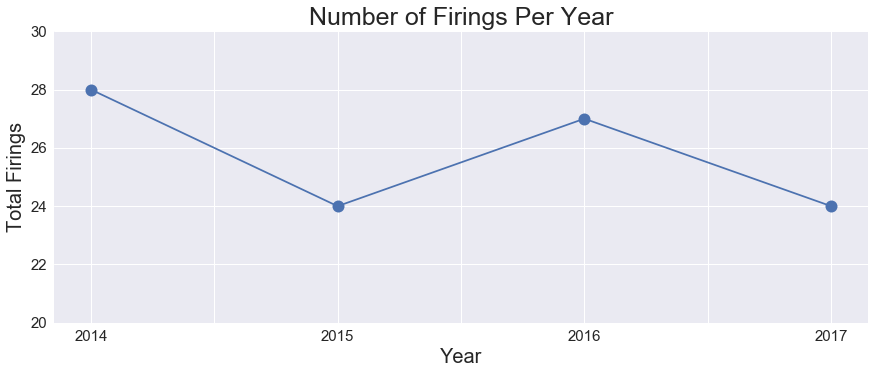

In [97]:
#This graph plots the total number of firings per year
fig, ax = plt.subplots()

DF_Fired_Alone['WHEN'].value_counts().sort_index().plot(style='.-', marker='o',markersize=12,figsize=(13,5))
#When doing a value count, it sorts by value, so this line ensures that the values are sorted by school

ax.set_ylim(20,30) #Y limits to make the graph tight around the actual reported values

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Total Firings', fontsize=20)
ax.set_title('Number of Firings Per Year', fontsize=25)

ax.tick_params(labelsize=15) #Sets the font size of the x-axis ticks
ax.set_xticklabels(['','2014','','2015','','2016','','2017']) #Sets the labels for the x-axis

ax.spines['top'].set_visible(False)

In [98]:
# This for loop counts the number of firings per year based on conference
for i, j in zip(range(2014,2018), range(0,4)):
    # creates DataFrames that lists only the conference title of fired coach for each year
    globals()['DF_Conf_%s' % str(i)] = DF_Fired_Alone.loc[DF_Fired_Alone['WHEN']==i].iloc[:,[(3+(j*23))]]
    
    # creates a dummy column in all the DataFrames populated with 1s for counting purposes
    globals()['DF_Conf_%s' % str(i)]['dummy']=1
    
    # groups by conference and sums the number of 1s in the dummy column to get a total number by conference
    globals()['DF_Conf_%s' % str(i)] = globals()['DF_Conf_%s' % str(i)].groupby(globals()['DF_Conf_%s' % str(i)].columns[0]).agg({'dummy':[sum]})
    globals()['DF_Conf_%s' % str(i)] = globals()['DF_Conf_%s' % str(i)].reset_index()
    # renames the columns for indexing purposes
    globals()['DF_Conf_%s' % str(i)].columns = ['Conference','Sum']
    

In [99]:
# Merges each of the DataFrames created in the last block to show number of firings per year and total sum for each conference
DF_Conf_Fireds = pd.merge(DF_Conf_2014,DF_Conf_2015, how='outer', on='Conference')
DF_Conf_Fireds = pd.merge(DF_Conf_Fireds,DF_Conf_2016, how='outer', on='Conference')
DF_Conf_Fireds = pd.merge(DF_Conf_Fireds,DF_Conf_2017, how='outer', on='Conference')

DF_Conf_Fireds.columns = ['Conference','2014','2015','2016','2017']
DF_Conf_Fireds = DF_Conf_Fireds.fillna(0) # Changes each of the NaN's to a 0 to solve addition issues

# Creates a total sum column based on each year's total
DF_Conf_Fireds['Total Sum'] = DF_Conf_Fireds['2014']+DF_Conf_Fireds['2015']+DF_Conf_Fireds['2016']+DF_Conf_Fireds['2017']
DF_Conf_Fireds = DF_Conf_Fireds.set_index('Conference')

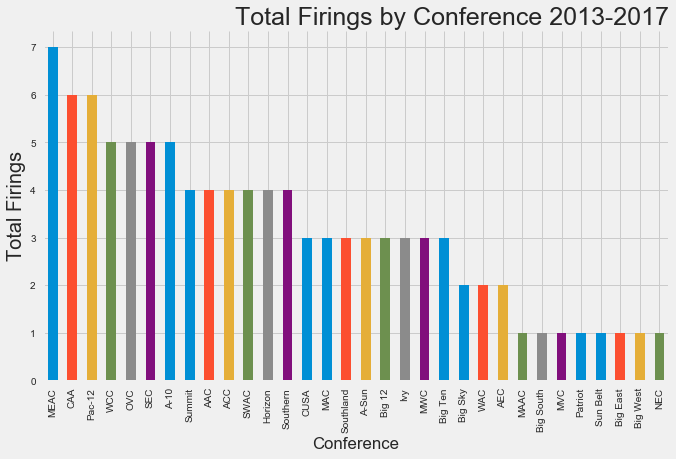

In [100]:
# Graphs the Total sum from the DF_Conf_Fireds DataFrame created in previous block
plt.style.use('fivethirtyeight') # setting the style

fig, ax = plt.subplots()

ax.set_ylabel('Total Firings',fontsize=20)
ax.set_title('Total Firings by Conference 2013-2017',loc='right',fontsize=25)

# sorts the columns by total sum so they appear from most to least in the plot
DF_Conf_Fireds['Total Sum'].sort_values(ascending=False).plot(ax=ax,kind='bar',figsize=(10,6))

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### First, looking at the number of firings per year, we noticed that they are remarkably stable, oscillating between 24 and 28 across all four years. Next, using groupby, we took the coach level data and aggregated up to the conference level to create a plot of the conferences that fire the most coaches. This graph was meant to give some insight as to whether major or minor conferences are more likely to fire coaches. Yet, the graph shows that both are among the highest frequency firers, with large conferences like the Pac-12 and SEC and small conferences like the MEAC and CAA all firing 5 or more coaches in 4 years, which is interesting in its own right.

### Having examined these basic features of just the fired coaches, we moved to explore all the coaches at schools where we generated performance benchmarks to see if there is a strong correlation between a coach underperforming in one season and their being fired. To determine the actual degree of underperformance, we subtracted the average win-loss percentage for each school over 20 years from the corresponding coach's win-loss percentage in each season, giving us nearly 300 coaches performance for each of the 5 years of coaching data. Once we had generated this coach performance data, we created a new DataFrame that only contained performance data. In the performance DataFrame we established binary variables that capture whether or not a coach underperformed in each season by creating code with a lambda function that filled columns with a 1 if a coach's performance value was negative for that season. Finally, we established another set of binary columns to capture if and when each coach was fired to enable us to run regressions, where a 1 in the column Fired2014 means they were fired after the 2013-2014 season and so on. With these manipulations we can finally assess whether there is a relationship between a coach underperforming in a season and whether they were fired after that season.

In [101]:
#This block of code creates the performance for each coach relative to the school's performance benchmark in the 2013-2014 season
DF_Benchmarks = DF_WL.reset_index()[['School','Mean']] #Selects only the school and the benchmark from DF_WL

DF_Coach13 = DF_Fired.iloc[:,[1,2,6]] #Pulls out the coach's name, their school, and their win loss percentage in 2013
DF_Coach13.rename(columns={'School_x':'School'}, inplace=True) #Column renaming to run the merge on school
DF_Benchmarks2013 = pd.merge(DF_Coach13, DF_Benchmarks, how='inner', on=['School'])
DF_Benchmarks2013['Performance_2013'] = (DF_Benchmarks2013['W-L%_2013']-DF_Benchmarks2013['Mean']) 
#Sets Performance in a given year equal to the Benchmark subtracted from the coaches' win-loss percentage

/Users/aaroncronin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [102]:
#These blocks of code do the same as the above for 2014-15 through 2017-2018
DF_Coach14 = DF_Fired.iloc[:,[1,25,29]]
DF_Coach14.rename(columns={'School_y':'School'}, inplace=True)
DF_Benchmarks2014 = pd.merge(DF_Coach14, DF_Benchmarks, how='inner', on=['School'])
DF_Benchmarks2014['Performance_2014'] = (DF_Benchmarks2014['W-L%_2014']-DF_Benchmarks2014['Mean'])

DF_Coach15 = DF_Fired.iloc[:,[1,48,52]]
DF_Coach15.rename(columns={'School_x.1':'School'}, inplace=True)
DF_Benchmarks2015 = pd.merge(DF_Coach15, DF_Benchmarks, how='inner', on=['School'])
DF_Benchmarks2015['Performance_2015'] = (DF_Benchmarks2015['W-L%_2015']-DF_Benchmarks2015['Mean'])

DF_Coach16 = DF_Fired.iloc[:,[1,71,75]]
DF_Coach16.rename(columns={'School_y.1':'School'}, inplace=True)
DF_Benchmarks2016 = pd.merge(DF_Coach16, DF_Benchmarks, how='inner', on=['School'])
DF_Benchmarks2016['Performance_2016'] = (DF_Benchmarks2016['W-L%_2016']-DF_Benchmarks2016['Mean'])

DF_Coach17 = DF_Fired.iloc[:,[1,94,98]]
DF_Benchmarks2017 = pd.merge(DF_Coach17, DF_Benchmarks, how='inner', on=['School'])
DF_Benchmarks2017['Performance_2017'] = (DF_Benchmarks2017['W-L%_2017']-DF_Benchmarks2017['Mean'])
#The final block does not need a column rename, the School column in the DF_Fired DataFrame for 2017-2018 was School


/Users/aaroncronin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [103]:
#These merges add the performance data back into the DF_Fired Dataframe to have a master source for all the data
DF_Fired = pd.merge(DF_Fired, DF_Benchmarks2013 , how='outer', on='Coach')
DF_Fired = pd.merge(DF_Fired, DF_Benchmarks2014 , how='outer', on='Coach')
DF_Fired = pd.merge(DF_Fired, DF_Benchmarks2015 , how='outer', on='Coach')
DF_Fired = pd.merge(DF_Fired, DF_Benchmarks2016 , how='outer', on='Coach')
DF_Fired = pd.merge(DF_Fired, DF_Benchmarks2017 , how='outer', on='Coach')
DF_Fired.head(5)

,Unnamed: 0,Coach,School_x,Conference_x,W_2013,L_2013,W-L%_2013_x,AP_Pre_2013,AP_Post_2013,NCAA_Tournament_2013,...,Mean_x,Performance_2015,School_x,W-L%_2016_y,Mean_y,Performance_2016,School_y,W-L%_2017_y,Mean,Performance_2017
0,0,Joe Golding,Abilene Christian,Southland,11.0,20.0,0.355,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Dave Pilipovich,Air Force,MWC,12.0,18.0,0.400,NaN,NaN,NaN,...,0.4345,0.0035,Air Force,0.364,0.4345,-0.0705,Air Force,0.387,0.43450,-0.04750
2,2,Keith Dambrot,Akron,MAC,21.0,13.0,0.618,NaN,NaN,NaN,...,0.5442,0.1988,Akron,0.750,0.5442,0.2058,Duquesne,0.500,0.37830,0.12170
3,3,Anthony Grant,Alabama,SEC,13.0,19.0,0.406,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Dayton,0.452,0.57965,-0.12765
4,4,Willie Hayes,Alabama A&M,SWAC,14.0,16.0,0.467,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#This creates a new DataFrame with just coach, school, conference, firing, and performance data to simplify subsequent analysis
DF_Performance = DF_Fired.iloc[:,[1,2,3,117,118,122,126,130,134,138]] 
DF_Performance.head(5)

,Coach,School_x,Conference_x,FIRED?,WHEN,Performance_2013,Performance_2014,Performance_2015,Performance_2016,Performance_2017
0,Joe Golding,Abilene Christian,Southland,N,NaN,NaN,NaN,NaN,NaN,NaN
1,Dave Pilipovich,Air Force,MWC,N,NaN,-0.0345,0.0175,0.0035,-0.0705,-0.04750
2,Keith Dambrot,Akron,MAC,N,NaN,0.0738,0.0558,0.1988,0.2058,0.12170
3,Anthony Grant,Alabama,SEC,Y,2015.0,-0.2011,-0.0451,NaN,NaN,-0.12765
4,Willie Hayes,Alabama A&M,SWAC,N,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
#First we loop through several columns within the data frame and create a new column.
#This new column will let us know whether a team has underperformed compared to its historical benchmark.
#We use .apply so that we can apply a function on the entire column which we are looping through.
#We then create a lambda function, which say if x<0, populate the new column with a 1 etc. (x will be the value within a cell of the column we are looping through)
for w in ['Performance_2013', 'Performance_2014', 'Performance_2015', 'Performance_2016', 'Performance_2017']:
    DF_Performance['Under_'+w]=DF_Performance[w].apply(lambda x: 1 if x < 0 else (0 if x>0 else np.NAN))

/Users/aaroncronin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [106]:
DF_Performance.head(5)

,Coach,School_x,Conference_x,FIRED?,WHEN,Performance_2013,Performance_2014,Performance_2015,Performance_2016,Performance_2017,Under_Performance_2013,Under_Performance_2014,Under_Performance_2015,Under_Performance_2016,Under_Performance_2017
0,Joe Golding,Abilene Christian,Southland,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dave Pilipovich,Air Force,MWC,N,NaN,-0.0345,0.0175,0.0035,-0.0705,-0.04750,1.0,0.0,0.0,1.0,1.0
2,Keith Dambrot,Akron,MAC,N,NaN,0.0738,0.0558,0.1988,0.2058,0.12170,0.0,0.0,0.0,0.0,0.0
3,Anthony Grant,Alabama,SEC,Y,2015.0,-0.2011,-0.0451,NaN,NaN,-0.12765,1.0,1.0,NaN,NaN,1.0
4,Willie Hayes,Alabama A&M,SWAC,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
#Here we are checking an array which contains all the unique string values in the 'WHEN' column
#This gives us all ths possible years a coach was fired
#'nan' means a coach was never fired
DF_Performance['WHEN'].astype(str).unique()

array(['nan', '2015.0', '2014.0', '2017.0', '2016.0'], dtype=object)

In [108]:
#Creating a series of new columns
for i in DF_Performance['WHEN'].astype(str).unique(): #Looping through the array mentioned above
    
    DF_Performance[i]=0 #Creating a new column for each entry in the array and setting all the column values to 0
    DF_Performance.loc[DF_Performance['WHEN'].astype(str).str.contains(i), i]=1
    #Finds all the locations where the column name appears in the "WHEN" column and then assign a value of 1 in the new columns.

/Users/aaroncronin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/aaroncronin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [109]:
#Renaming the columns to be more clear
DF_Performance = DF_Performance.rename(columns={'nan': 'Never_fired', '2015.0':'Fired2015', '2014.0':'Fired2014', '2017.0':'Fired2017', '2016.0':'Fired2016'})

In [110]:
DF_Performance.head(5)

,Coach,School_x,Conference_x,FIRED?,WHEN,Performance_2013,Performance_2014,Performance_2015,Performance_2016,Performance_2017,Under_Performance_2013,Under_Performance_2014,Under_Performance_2015,Under_Performance_2016,Under_Performance_2017,Never_fired,Fired2015,Fired2014,Fired2017,Fired2016
0,Joe Golding,Abilene Christian,Southland,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
1,Dave Pilipovich,Air Force,MWC,N,NaN,-0.0345,0.0175,0.0035,-0.0705,-0.04750,1.0,0.0,0.0,1.0,1.0,1,0,0,0,0
2,Keith Dambrot,Akron,MAC,N,NaN,0.0738,0.0558,0.1988,0.2058,0.12170,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
3,Anthony Grant,Alabama,SEC,Y,2015.0,-0.2011,-0.0451,NaN,NaN,-0.12765,1.0,1.0,NaN,NaN,1.0,0,1,0,0,0
4,Willie Hayes,Alabama A&M,SWAC,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0


### This first set of regressions explores the relationship between whether a coach underperforms and whether they were fired using the binary underperformance and firing variables. As a result, these regressions have some unique properties, and do not take into account the degree to which any given coach underperformed. 

In [111]:
print(smf.ols('Fired2014 ~ Under_Performance_2013', data=DF_Performance).fit().summary())
#Regresses whether or not a coach underperformed in the 2013-2014 season against whether or not they were fired after that season

                            OLS Regression Results                            
Dep. Variable:              Fired2014   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     17.75
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           3.36e-05
Time:                        01:12:11   Log-Likelihood:                -37.155
No. Observations:                 298   AIC:                             78.31
Df Residuals:                     296   BIC:                             85.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [112]:
print(smf.ols('Fired2015 ~ Under_Performance_2014', data=DF_Performance).fit().summary())
#Regresses whether or not a coach underperformed in the 2014-2015 season against whether or not they were fired after that season

                            OLS Regression Results                            
Dep. Variable:              Fired2015   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     8.148
Date:                Fri, 21 Dec 2018   Prob (F-statistic):            0.00462
Time:                        01:12:11   Log-Likelihood:                -6.3731
No. Observations:                 297   AIC:                             16.75
Df Residuals:                     295   BIC:                             24.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [113]:
print(smf.ols('Fired2016 ~ Under_Performance_2015', data=DF_Performance).fit().summary())
#Regresses whether or not a coach underperformed in the 2015-2016 season against whether or not they were fired after that season

                            OLS Regression Results                            
Dep. Variable:              Fired2016   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     8.217
Date:                Fri, 21 Dec 2018   Prob (F-statistic):            0.00444
Time:                        01:12:11   Log-Likelihood:                -35.491
No. Observations:                 301   AIC:                             74.98
Df Residuals:                     299   BIC:                             82.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [114]:
print(smf.ols('Fired2017 ~ Under_Performance_2016', data=DF_Performance).fit().summary())
#Regresses whether or not a coach underperformed in the 2016-2017 season against whether or not they were fired after that season

                            OLS Regression Results                            
Dep. Variable:              Fired2017   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     9.720
Date:                Fri, 21 Dec 2018   Prob (F-statistic):            0.00200
Time:                        01:12:11   Log-Likelihood:                -4.7438
No. Observations:                 299   AIC:                             13.49
Df Residuals:                     297   BIC:                             20.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

### Using the four years of firing data against the binary underperformance for each commensurate season, the regressions revealed very low R-squared values across the board, ranging from .027 to .057. This figure means that only ~3%-6% of the variance in fired coaches can be explained by whether or not coaches underperformed. As a result, the greatest correlation, found in the 2013-2014 season, is only r = .239, which is fairly weak. Despite this small relationship, the F-statistics were 8.217 or greater, demonstrating that each regression has a less than 1% likelihood of being due to random chance, meaning these relationships are still statistically significant. The coefficients on the underperformance variable within the regressions also have statistically significant t-statistics.

### The conditional expectation function in these regressions also reveals the underwhelming nature of the result. The expected value for the dependent variable whether or not a coach was fired, given as E[Fired]  is conditional on whether or not a coach underperformed. If they did not underperform, E[Fired] is equivalent to the coefficient for the intercept, which shows a 2-4% chance of a coach being fired if they overperformed depending on the year. If the coach did underperform E[Fired] is equivalent to the intercept coefficient plus the underperformance coefficient, which corresponds to only an 11-15% chance of firing for underperforming coaches.

### Overall, these results were underwhelming as we were hoping this underperformance indicator would demonstrate a stronger correlation between coaches that underperform and those who are fired. To explore why this result occured, we chose to look again at the total number of coaches who were fired in a given year, and compare that to whether they overperformed or underperformed the benchmark, as too many overperformers being fired may hinder the result of the regression.

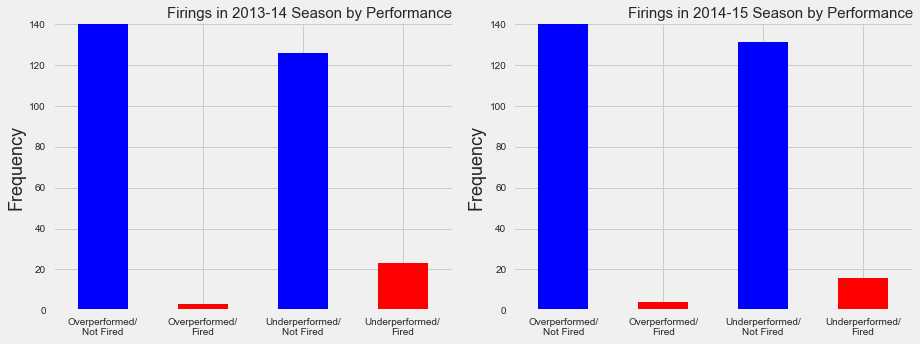

In [115]:
# Creating bar charts to show the relationship between calculated performance and whether or not a coach was fired
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,5)) #Allows us to put multiple graphs on one plot

# Group by two variables: over/under performance in 2013-2014 and whether or not they were fired following that season
# Change the colors of the bars so the fired coaches show up in red
DF_Performance.groupby(['Under_Performance_2013','Fired2014']).size().plot(ax=ax1,kind='bar',color=['blue','red','blue','red'])
ax1.set_xlabel('',fontsize=18)
ax1.set_ylabel('Frequency',fontsize=18)
ax1.set_ylim(0,140) # setting a uniform y-axis for all graphs
ax1.set_title('Firings in 2013-14 Season by Performance',loc='right',fontsize=15)

# Setting the x-axis tick labels to represent the four groups
ax1.set_xticklabels(['Overperformed/\nNot Fired', 'Overperformed/\nFired','Underperformed/\nNot Fired','Underperformed/\nFired'],rotation=0)

ax1.spines['top'].set_visible(False)

# Replicating the same process as above for the next season
DF_Performance.groupby(['Under_Performance_2014','Fired2015']).size().plot(ax=ax2,kind='bar',color=['blue','red','blue','red'])
ax2.set_xlabel('',fontsize=18)
ax2.set_ylabel('Frequency',fontsize=18)
ax2.set_title('Firings in 2014-15 Season by Performance',loc='right',fontsize=15)
ax2.set_ylim(0,140)

ax2.set_xticklabels(['Overperformed/\nNot Fired', 'Overperformed/\nFired','Underperformed/\nNot Fired','Underperformed/\nFired'],rotation=0)

ax2.spines['top'].set_visible(False)

plt.tight_layout()

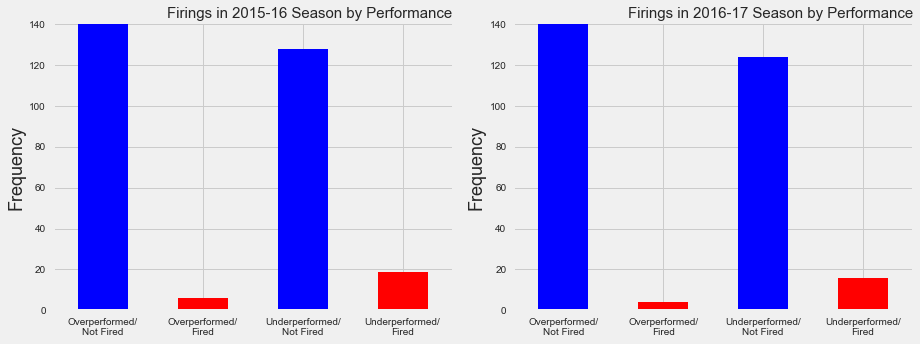

In [116]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,5))
# Replicating the same process as above for the next season
DF_Performance.groupby(['Under_Performance_2015','Fired2016']).size().plot(ax=ax1,kind='bar',color=['blue','red','blue','red'])
ax1.set_xlabel('',fontsize=18)
ax1.set_ylabel('Frequency',fontsize=18)
ax1.set_ylim(0,140)
ax1.set_title('Firings in 2015-16 Season by Performance',loc='right',fontsize=15)

ax1.set_xticklabels(['Overperformed/\nNot Fired', 'Overperformed/\nFired','Underperformed/\nNot Fired','Underperformed/\nFired'],rotation=0)

ax1.spines['top'].set_visible(False)

# Replicating the same process as above for the next season
DF_Performance.groupby(['Under_Performance_2016','Fired2017']).size().plot(ax=ax2,kind='bar',color=['blue','red','blue','red'])
ax2.set_xlabel('',fontsize=18)
ax2.set_ylabel('Frequency',fontsize=18)
ax2.set_ylim(0,140)
ax2.set_title('Firings in 2016-17 Season by Performance',loc='right',fontsize=15)

ax2.set_xticklabels(['Overperformed/\nNot Fired', 'Overperformed/\nFired','Underperformed/\nNot Fired','Underperformed/\nFired'],rotation=0)

ax2.spines['top'].set_visible(False)

plt.tight_layout()

In [117]:
#A short block of code to help us look at how many fired coaches are actually included in the regression 
#Some Coaches are eliminated because their schools do not have performance benchmarks
Fire_Check = DF_Performance.loc[DF_Performance['Fired2017']==1].dropna(subset=['Performance_2016'])
Fire_Check.shape #The number of rows is the number of fired coaches in the 2016-2017 regressions

(20, 20)

### These four bar plots confirm a general expectation: fired coaches are more likely to be underperforming coaches. The Underperformed/Fired is larger that Overperformed/Fired in every graph. However, these graphs more clearly depict that far more coaches that underperform are not fired than those that are. This finding means that the regressions failed to show a stronger correlation because there simply are not that many coaches being fired in a given year. Additionally, the 2013-14 season showing the strongest correlation supports this assertion because it was the year with the most firings total. 

### Yet, we felt the degree of performance may still be a significant factor, as the coaches who slightly underperform may keep their jobs, but those who significantly underperform ought to be more likely to be fired. We examined this premise with the following regressions.

In [118]:
print(smf.ols('Fired2014 ~ Performance_2013', data=DF_Performance).fit().summary())
#Regresses degree of coach underperformance in the 2013-2014 season against whether or not they were fired after that season

                            OLS Regression Results                            
Dep. Variable:              Fired2014   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     29.88
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           9.78e-08
Time:                        01:12:12   Log-Likelihood:                -31.503
No. Observations:                 298   AIC:                             67.01
Df Residuals:                     296   BIC:                             74.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0889      0.016  

In [119]:
print(smf.ols('Fired2015 ~ Performance_2014', data=DF_Performance).fit().summary())
#Regresses degree of coach underperformance in the 2014-2015 season against whether or not they were fired after that season

                            OLS Regression Results                            
Dep. Variable:              Fired2015   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     10.37
Date:                Fri, 21 Dec 2018   Prob (F-statistic):            0.00143
Time:                        01:12:12   Log-Likelihood:                -5.2895
No. Observations:                 297   AIC:                             14.58
Df Residuals:                     295   BIC:                             21.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0675      0.014  

In [120]:
print(smf.ols('Fired2016 ~ Performance_2015', data=DF_Performance).fit().summary())
#Regresses degree of coach underperformance in the 2015-2016 season against whether or not they were fired after that season

                            OLS Regression Results                            
Dep. Variable:              Fired2016   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     14.44
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           0.000176
Time:                        01:12:12   Log-Likelihood:                -32.475
No. Observations:                 301   AIC:                             68.95
Df Residuals:                     299   BIC:                             76.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0840      0.016  

In [121]:
print(smf.ols('Fired2017 ~ Performance_2016', data=DF_Performance).fit().summary())
#Regresses degree of coach underperformance in the 2016-2017 season against whether or not they were fired after that season

                            OLS Regression Results                            
Dep. Variable:              Fired2017   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     8.943
Date:                Fri, 21 Dec 2018   Prob (F-statistic):            0.00302
Time:                        01:12:12   Log-Likelihood:                -5.1228
No. Observations:                 299   AIC:                             14.25
Df Residuals:                     297   BIC:                             21.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0665      0.014  

### The results of regressing degree of performance against firing did not prove to be much better than the previous regressions. Some R-squared values increased as they now range from .029 to .092, but curiously the R-squared value for the 2016-2017 season fell. Ultimately the highest correlation at r = .3033 is still in the 2013-14 season, which has the highest number of firings. The F-statistics range from 8.943 to 29.88, showing that despite the fact that the degree of performance still predicts very little variance in firings, the result is statistically significant. Likewise, the coefficients also have statistically significant t-values across the board.

### With this data set we hoped to use the conditional expectation function to determine an exact threshold for underperformance beyond which point a coach would be more likely to be fired. To determine this threshold for each regression, one could set y-hat equal to .5 and manipulate the CEF to get x, the performance level, alone on one side of the equation. In essence, (.5 - intercept_coefficient)/performance_coefficient should reveal that threshold. However, in practice, all but one of the thresholds are less that -1, which is impossible. The value -1 is the absolute limit for performance and would represent a team that won every game for the 20 year period we assessed to set the benchmark and then lost every game in one of the season we assessed in the coach DataFrames. The only possible threshold is 2013-2014 at -0.7036, however no coach came anywhere near this value, meaning it has no predictive validity. 

### Again, we found the lack of a stronger result fairly surprising, and decided to examine the degree of underperformance among the fired coaches in each year using histograms to see if our prediction that the worst performing coaches were the ones that were fired was actually true.

In [122]:
# Creating a DataFrame for each season tracking only performance of fired coaches to make histograms
Perf2013 = DF_Performance.loc[DF_Performance['Fired2014']==1]['Performance_2013']
Perf2014 = DF_Performance.loc[DF_Performance['Fired2015']==1]['Performance_2014']
Perf2015 = DF_Performance.loc[DF_Performance['Fired2016']==1]['Performance_2015']
Perf2016 = DF_Performance.loc[DF_Performance['Fired2017']==1]['Performance_2016']

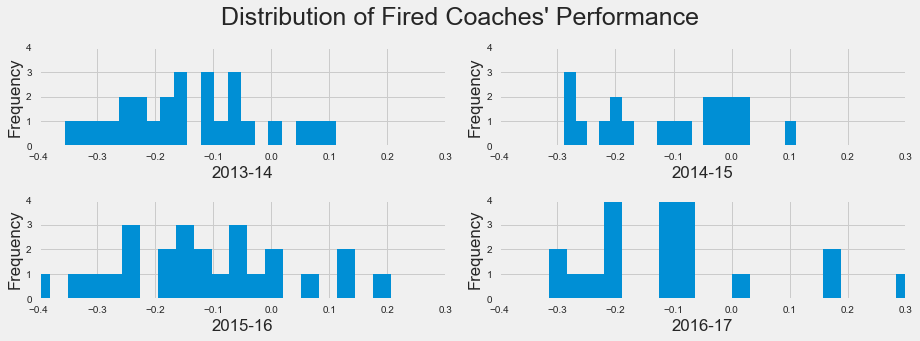

In [123]:
# Creating histograms of fired coaches' performance in subplots so it produces all in one graph.
fig = plt.figure()

fig.suptitle("Distribution of Fired Coaches' Performance",fontsize=25)

ax1 = plt.subplot(2,2,1) # determining which subplot to put the graph in
Perf2013.plot(kind='hist',bins=20,figsize=(13,5)) # setting the number of bins for precision
ax1.set_ylim(0, 4) # setting uniform y-axis limit
ax1.set_xlim(-.4, .3) # setting uniform x-axis limit
ax1.set_xlabel('2013-14')

ax2 = plt.subplot(2,2,2) # top right subplot
Perf2014.plot(kind='hist',bins=20)
ax2.set_ylim(0, 4)
ax2.set_xlim(-.4, .3)
ax2.set_xlabel('2014-15')

ax3 = plt.subplot(2,2,3) # bottom left subplot
Perf2015.plot(kind='hist',bins=20)
ax3.set_ylim(0, 4)
ax3.set_xlim(-.4, .3)
ax3.set_xlabel('2015-16')

ax4 = plt.subplot(2,2,4) # bottom right subplot
Perf2016.plot(kind='hist',bins=20)
ax4.set_ylim(0, 4)
ax4.set_xlim(-.4, .3)
ax4.set_xlabel('2016-17')

fig.tight_layout(rect=[0,0.03,1,.92]) # adjust the subplots to fit into figure area and below title


### These histograms demonstrate that fired coaces come from all levels of performance, and even include some overperformers as the bar plots also showed. This result revealed why regressing on degree of performance did not provide much more validity than just a coach underperforming. Additionally, the 2016-2017 season had the highest positive outlier, with a fired coach who significantly overperformed, which may demonstrate why the 2016-2017 regression on degree of performance against firing was the weakest. 

### Without any clear threshold for underperformance that makes a coach more likely to be fired, we have no way to predict which coaches would be fired from the 2017-2018 season. Instead, we turned to the benchmark itself, the average win-loss percentages for all the schools. Perhaps simplifying 20 years of data into a single metric is not a valid benchmark, and therefore threw off our calculations and regressions. As a result, we decided to explore ways to reintroduce information lost in the process of distilling the variables to see if they retained similar stratification.

## Section 4: Using Machine Learning Techniques to Assess Performance Clusters in 2 Dimensions

### Using PCA from Scikit Learn, we can decompose our twenty years of win-loss percentages into a set number of dimensions and assess how much information each level reveals. The explained variance ratio attribute demonstrates how much information about the original data is given by each component when a DataFrame is limited to fewer dimensions. Using the win-loss data by school, simplifying the data to one dimension, like taking the mean win-loss percentage across 20 years, gives only 33% of the information contained in all 20 years. Having two dimensions means the two values provide over 44% of the information. Although this is still not the entire picture of each schools performance, we can create labels using the original one dimensional stratification by sorting schools into 4 quartiles based on their mean win-loss percentage, and graphically see if those quartiles make distinct clusters when the performance data is decomposed into two dimensions to assess the veracity of the benchmark we chose.

In [124]:
# Creating a new DataFrame sorted by mean W/L %, but only including the 20 years of raw win-loss percentage
DF_Clustering=DF_WL.sort_values('Mean', ascending=False).iloc[:,:-1]

In [125]:
from sklearn.decomposition import PCA #Importing PCA to perform the dimension reduction

In [126]:
pca_1 = PCA(n_components=1) #Performing dimensionality reduction from 20 dimensions to 1 dimesnion
clustering_data=pd.DataFrame(pca_1.fit_transform(DF_Clustering))

In [127]:
pca_1.explained_variance_ratio_ #How much information is given by just the mean win-loss percentage 

array([0.33203255])

In [128]:
pca_2 = PCA(n_components=2) #performing dimesionality reduction from n dimensions to 2 dimensions
clustering_data=pd.DataFrame(pca_2.fit_transform(DF_Clustering))

In [129]:
pca_2.explained_variance_ratio_ #How much information is added when considering 2 dimensions

array([0.33203255, 0.11101841])

In [130]:
#Creates a list to use to label the quartiles in our new clustering dataset
target_lables=(['Top Quartile'] * 75 + ['Upper-Middle Quartile'] * 75 + ['Lower-Middle Quartile']*74 + ['Bottom Quartile']*74)

In [131]:
clustering_data['Target'] = target_lables #Creates the column and fills it with the values from the list

In [132]:
clustering_data=clustering_data.rename(columns={0: 'Principal Component 1', 1:'Principal Component 2'})

In [133]:
clustering_data['School'] = DF_Clustering.reset_index()['School'] #Adding in a column with Schools for labeling in the plot

In [134]:
# dividing the clustering_data DataFrame into four smaller DataFrames based on quartile
top_cluster = clustering_data.loc[clustering_data['Target']=='Top Quartile']
um_cluster = clustering_data.loc[clustering_data['Target']=='Upper-Middle Quartile']
lm_cluster = clustering_data.loc[clustering_data['Target']=='Lower-Middle Quartile']
bottom_cluster = clustering_data.loc[clustering_data['Target']=='Bottom Quartile']

In [135]:
import plotly #We have to import plotly for the next graph 
plotly.tools.set_credentials_file(username='tcr278', api_key='tsnpVGbKgu1MPGKsqgdN') #Here I'm logging into my plotly account
plotly.tools.set_config_file(world_readable=True,
                             sharing='public') #We ensure that the graph can be viewed by anyone.

# this cell uses the plotly library to create a scatter plot of each of the four quartiles
# plotly must be installed and imported for this cell and the graph to properly display

# creating traces of each quartile to be plotted
trace1 = go.Scatter( # each trace is a scatter plot
        x = top_cluster['Principal Component 1'], # sets the x-axis to the first principal componenet
        y = top_cluster['Principal Component 2'], # sets the y-axis to the second principal component
        mode  = 'markers', # sets the mode of each of the data points to be plotted, in this case each dot is a School
        text = top_cluster['School'], # setting the hover text
        hoverinfo = 'text', # when hovering over a data point, it shows the corresponding name of the school
        name = 'Top Quartile', # sets this trace's name in the legend
)
trace2 = go.Scatter(
        x = um_cluster['Principal Component 1'],
        y = um_cluster['Principal Component 2'],
        mode  = 'markers',
        text = um_cluster['School'],
        hoverinfo = 'text',
        name = 'Upper-Middle Quartile'
)
trace3 = go.Scatter(
        x = lm_cluster['Principal Component 1'],
        y = lm_cluster['Principal Component 2'],
        mode  = 'markers',
        text = lm_cluster['School'],
        hoverinfo = 'text',
        name = 'Lower-Middle Quartile',
)
trace4 = go.Scatter(
        x = bottom_cluster['Principal Component 1'],
        y = bottom_cluster['Principal Component 2'],
        mode  = 'markers',
        text = bottom_cluster['School'],
        hoverinfo = 'text',
        name = 'Bottom Quartile'
)

data = [trace1,trace2,trace3,trace4] # compiling each of the traces into one data array
layout = go.Layout(legend=dict(x=.12, y=1.2,orientation='h')) # setting the layout of the graph and positioning of the legend
fig = go.Figure(data=data, layout=layout) # creating the figure

pyt.iplot(fig,filename='Quartile Cluster Graph') # plotting the data onto the figure

# Note: If an error occurs when running the above code and the plot doesnt appear.
# Follow the link below and see the plot on the website


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tcr278/0 or inside your plot.ly account where it is named 'Quartile Cluster Graph'


#### NOTE: If an error appears when looking at this block of code or the plot does not appear, check to make sure you have plotly installed and reopen it or follow this link to see the same interactive plot on the plotly website https://plot.ly/~tcr278/0

### The scatterplot demonstrates that the quartiles established by the mean still show up in very clear clusters when the scatterplot assess the school's performance in two dimensions. These clusters show that although the benchmark we chose does eliminate information about the performance of the schools, it still seems to tell a lot about their relative standing amongst other college basketball teams. Ultimately, this suggests that the benchmark was also not the cause for the limited findings from the regression, meaning the most likely culprit was the low n for firings.

## Section 5: Conclusion and Future Research Opportunities

### The data as analyzed ultimately suggests that a coach who underperforms in any given season is only slightly more likely to be fired, and degree of underperformance does not significantly compound that probability. As a result, one must conclude that other factors contribute to firing decisions in college basketball, and others may loom larger than a coach's performance. For example, whether or not a coach underperforms in multiple successive years may predict firing. Firing may also hinge upon a coach's ability to win against rivals, or do well in post-season tournaments. Furthermore, firing decisions may depend on harder to measure factors like a coach's successfulness as a recruiter, or their temperament and rapport with the student athletes. Additionally, scandals may cause coaches at varying levels of performance to be fired, and it would be interesting to somehow quantify how bad a scandal needs to be in order for a coach to be fired. All in all, despite the underwhelming result, our research does quantify the extent to which single-season underperformance relates to firing college basketball coaches, and gives clear opportunities to further explore this phenomenon.

## Section 6: Data Sources and Coding Resources Used
### Data Sources:
#### https://www.sports-reference.com/cbb/seasons/1994-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/1995-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/1996-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/1997-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/1998-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/1999-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2000-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2001-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2002-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2003-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2004-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2005-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2006-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2007-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2008-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2009-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2010-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2011-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2012-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2013-school-stats.html
#### https://www.sports-reference.com/cbb/seasons/2014-coaches.html
#### https://www.sports-reference.com/cbb/seasons/2015-coaches.html
#### https://www.sports-reference.com/cbb/seasons/2016-coaches.html
#### https://www.sports-reference.com/cbb/seasons/2017-coaches.html
#### https://www.sports-reference.com/cbb/seasons/2018-coaches.html
#### http://collegesportsinfo.com/2014/01/31/2014-college-basketball-coach-changes/
#### http://collegesportsinfo.com/2015/03/05/2015-college-basketball-coaching-changes/
#### http://collegesportsinfo.com/2016/01/17/2016-college-basketball-coaching-changes/
#### http://collegesportsinfo.com/2017/08/08/2017-college-basketball-coach-changes/
### Coding Resources:
#### https://nyudatabootcamp.gitbook.io/thebook/
#### Data Bootcamp Lectures - Fall 2018
#### Stackoverflow for miscellaneous help
#### https://plot.ly/python/line-and-scatter/
### Github with Complete Set of Files Used for the Project
#### https://github.com/aaroncronin/CroninHurtubiseRosler_DataBootcampProject